# Twitter Sentiment Analysis

## Loading Libraries and Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for manipulating text
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

## Data Preprocessing

In [3]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [4]:
train["label"].value_counts()/len(train)

0    0.929854
1    0.070146
Name: label, dtype: float64

it is an imbalanced dataset

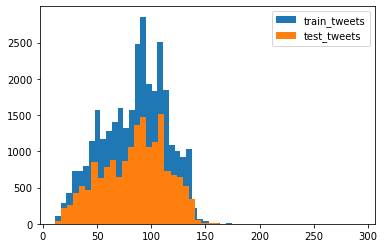

In [5]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=50, label="train_tweets")
plt.hist(length_test, bins=50, label="test_tweets")
plt.legend()
plt.show()

Distribution of length of tweets is similar in both train and test data.

In [26]:
df = train.append(test, ignore_index=True)
df.shape

(49159, 3)


### Data Manipulation

__1. Removing Twitter Handles__

In [27]:
import re
def clean(text, pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i, '', text)
        
    return text    

In [28]:
df['clean1_tweet'] = np.vectorize(clean)(df['tweet'], "@[\w]*") 
df.head()

,id,label,tweet,clean1_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


#### 2. Removing stop words

In [29]:
from nltk.corpus import stopwords

In [30]:
df['clean1_tweet'] = df['clean1_tweet'].apply(lambda x: ' '.join([words for words in x.split() if words.lower() not in stopwords.words('english')]))

In [31]:
df.head()

,id,label,tweet,clean1_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


__2. Removing Punctuations, Numbers, and Special Characters__

In [32]:
df['clean1_tweet'] = df['clean1_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean1_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can t use cause offer whee...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur ...
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


__3. Removing Short Words__

In [33]:
df['clean1_tweet'] = df['clean1_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [34]:
df.head()

,id,label,tweet,clean1_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


__4. Text Normalization__



In [35]:
tokenized_tweet = df['clean1_tweet'].apply(lambda x: x.split()) 

In [36]:
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: clean1_tweet, dtype: object

In [37]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [38]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['clean1_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean1_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#### Visulaization of tweets



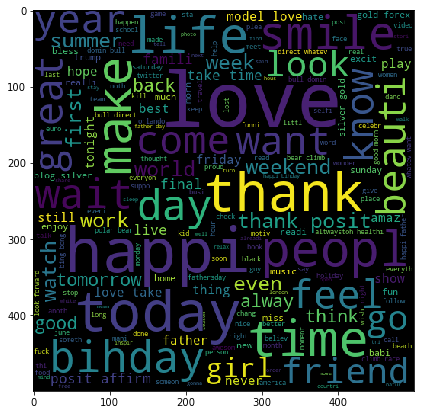

In [39]:
all_words = ' '.join([text for text in df['clean1_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)


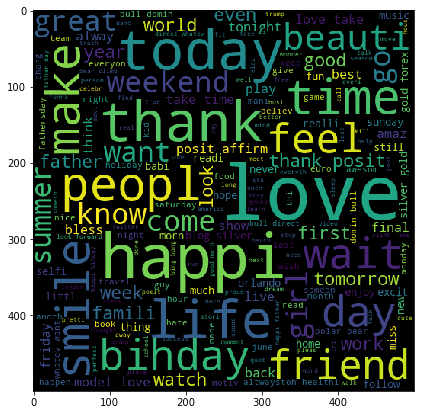

In [40]:
positive_words =' '.join([text for text in df['clean1_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=500, height=500, max_font_size=100).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)


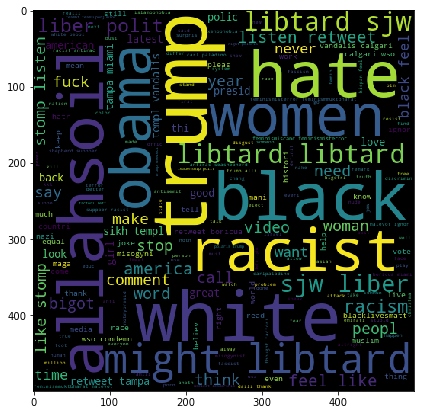

In [41]:
negative_words =' '.join([text for text in df['clean1_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=500, height=500, max_font_size=100).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)


As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

#### Visualization of hashtags

In [42]:

def hash_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
pos_hash = hash_extract(df['clean1_tweet'][df['label'] == 0])
neg_hash = hash_extract(df['clean1_tweet'][df['label'] == 1])


In [46]:
pos_list=sum(pos_hash,[])
neg_list=sum(neg_hash,[])

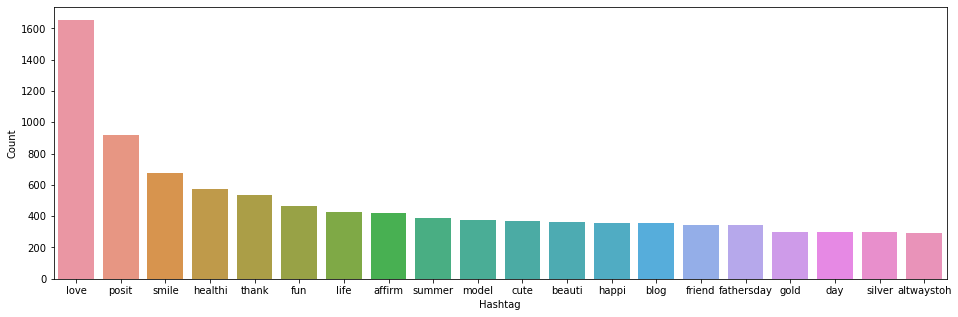

In [50]:
#positive hashtags
a = nltk.FreqDist(pos_list)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

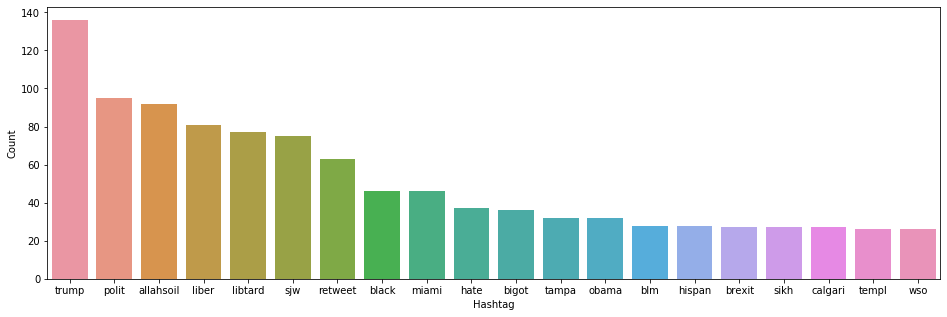

In [52]:
#negative hashtags
b = nltk.FreqDist(neg_list)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

## Feature Extraction from tweets 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

### Bag-of-Words Features

In [57]:
vectorizer = CountVectorizer(max_features=1000)
vector = vectorizer.fit_transform(df['clean1_tweet'])
vector.shape

(49159, 1000)

## Model Building




In [59]:
#seperating test and train given in the problem dataset

In [61]:
len(train),len(test)

(31962, 17197)

In [62]:
train_data = vector[:31962,:]
test_data = vector[31962:,:]

In [101]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(train_data, train['label'], random_state=23, test_size=0.3)
from sklearn.metrics import f1_score

### 1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [102]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
prediction = lreg.predict_proba(x_valid)
prediction

array([[9.96488508e-01, 3.51149195e-03],
       [9.12332921e-01, 8.76670793e-02],
       [9.02111176e-01, 9.78888244e-02],
       ...,
       [9.99588968e-01, 4.11031625e-04],
       [9.98967425e-01, 1.03257494e-03],
       [9.99676049e-01, 3.23950563e-04]])

In [110]:
prediction[:,1]

array([0.00351149, 0.08766708, 0.09788882, ..., 0.00041103, 0.00103257,
       0.00032395])

In [111]:
for i in range(len(prediction)):
    if prediction[:,1][i]>=0.3:
        prediction[:,1][i]=1
    else:
        prediction[:,1][i]=0
        
    

In [112]:
f1_score(y_valid,prediction[:,1].astype(int))

0.5600662800331401

In [113]:
#### making predictions for the given test data

test_prediction = lreg.predict_proba(test_data)
for i in range(len(test_prediction)):
    if test_prediction[:,1][i]>=0.3:
        test_prediction[:,1][i]=1
    else:
        test_prediction[:,1][i]=0
        
test_prediction[:,1].astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
test['label']=test_prediction[:,1]
submission = test[['id','label']]
submission.to_csv('lreg.csv', index=False)

### 2. RandomForest

In [115]:
from sklearn.ensemble import RandomForestClassifier

#### Bag-of-Words Features

In [123]:
rf = RandomForestClassifier(n_estimators=100, random_state=11).fit(x_train,y_train)
prediction = rf.predict(x_valid)
f1_score(y_valid, prediction)

0.5613496932515337

In [125]:
test_prediction = rf.predict(test_data)
test['label'] = test_prediction
submission = test[['id','label']]
submission.to_csv('rf.csv', index=False)

### 3. XGBoost

In [126]:
from xgboost import XGBClassifier

#### Bag-of-Words Features

In [146]:
xgb = XGBClassifier().fit(x_train,y_train)
prediction = xgb.predict(x_valid)
f1_score(y_valid, prediction)

0.46975806451612895

In [147]:
test_prediction = xgb.predict(test_data)
test['label'] = test_prediction
submission = test[['id','label']]
submission.to_csv('xgb.csv', index=False)


## Model Finetuning

In [155]:
import xgboost as xgb

In [156]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_valid, label=y_valid)
dtest = xgb.DMatrix(test_data)

In [168]:
params = {'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3}

In [158]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

*Tuning max_depth* and *min_child_weight*

In [159]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12) 
    for min_child_weight in range(2,5)
]

In [160]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=9, min_child_weight=2
	F1 Score 0.5371674 for 68 rounds
CV with max_depth=9, min_child_weight=3
	F1 Score 0.5481144 for 129 rounds
CV with max_depth=9, min_child_weight=4
	F1 Score 0.5322386000000001 for 77 rounds
CV with max_depth=10, min_child_weight=2
	F1 Score 0.4802878 for 1 rounds
CV with max_depth=10, min_child_weight=3
	F1 Score 0.5325008 for 56 rounds
CV with max_depth=10, min_child_weight=4
	F1 Score 0.5285532 for 47 rounds
CV with max_depth=11, min_child_weight=2
	F1 Score 0.5335834 for 55 rounds
CV with max_depth=11, min_child_weight=3
	F1 Score 0.48324160000000005 for 1 rounds
CV with max_depth=11, min_child_weight=4
	F1 Score 0.4856802 for 2 rounds
Best params: 9, 3, F1 Score: 0.5481144


Updating __max_depth__ and __min_child_weight__ parameters.

In [169]:
params['max_depth'] = 9
params['min_child_weight'] = 3

Now let's tune the learning rate.

In [170]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.5481144 for 129 rounds
CV with eta=0.2
	F1 Score 0.5375946 for 119 rounds
CV with eta=0.1
	F1 Score 0.477807 for 5 rounds
CV with eta=0.05
	F1 Score 0.483529 for 11 rounds
CV with eta=0.01
	F1 Score 0.1282296 for 0 rounds
CV with eta=0.005
	F1 Score 0.1282296 for 0 rounds
Best params: 0.3, F1 Score: 0.5481144


In [171]:
params['eta'] = .3

Now lets tune __gamma__ value using the parameters already tuned above. We’ll check for 5 values here.

In [172]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0
	F1 Score 0.5481144 for 129 rounds
CV with gamma=0.1
	F1 Score 0.5467056 for 130 rounds
CV with gamma=0.2
	F1 Score 0.5349496 for 60 rounds
CV with gamma=0.3
	F1 Score 0.5288264 for 40 rounds
CV with gamma=0.4
	F1 Score 0.5294942 for 48 rounds
CV with gamma=0.5
	F1 Score 0.5443195999999999 for 98 rounds
CV with gamma=0.6
	F1 Score 0.5308948000000001 for 57 rounds
CV with gamma=0.7
	F1 Score 0.5282794 for 55 rounds
CV with gamma=0.8
	F1 Score 0.5276884 for 55 rounds
CV with gamma=0.9
	F1 Score 0.5312028 for 58 rounds
CV with gamma=1.0
	F1 Score 0.5304572 for 55 rounds
CV with gamma=1.1
	F1 Score 0.530374 for 61 rounds
CV with gamma=1.2
	F1 Score 0.5323232 for 58 rounds
CV with gamma=1.3
	F1 Score 0.5256022 for 38 rounds
CV with gamma=1.4
	F1 Score 0.5324945999999999 for 64 rounds
Best params: 0.0, F1 Score: 0.5481144


In [173]:
params['gamma'] = 0.0

Let's have a look at the final list of parameters.

In [174]:
params

{'objective': 'binary:logistic',
 'max_depth': 9,
 'min_child_weight': 3,
 'eta': 0.3,
 'gamma': 0.0}

In [176]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=20
)

[0]	Validation-error:0.05955	Validation-f1_score:0.13770
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 20 rounds.
[1]	Validation-error:0.05965	Validation-f1_score:0.48958
[2]	Validation-error:0.05965	Validation-f1_score:0.49283
[3]	Validation-error:0.05965	Validation-f1_score:0.48485
[4]	Validation-error:0.06069	Validation-f1_score:0.46765
[5]	Validation-error:0.06069	Validation-f1_score:0.45753
[6]	Validation-error:0.05913	Validation-f1_score:0.48104
[7]	Validation-error:0.05986	Validation-f1_score:0.47429
[8]	Validation-error:0.06080	Validation-f1_score:0.46198
[9]	Validation-error:0.05986	Validation-f1_score:0.47172
[10]	Validation-error:0.05976	Validation-f1_score:0.47519
[11]	Validation-error:0.05892	Validation-f1_score:0.47756
[12]	Validation-error:0.05924	Validation-f1_score:0.47893
[13]	Validation-error:0.05944	Validation-f1_score:0.47601
[14]	Validation-error:0.05934	Valid

[138]	Validation-error:0.05506	Validation-f1_score:0.57214
[139]	Validation-error:0.05506	Validation-f1_score:0.57333
[140]	Validation-error:0.05517	Validation-f1_score:0.57333
[141]	Validation-error:0.05517	Validation-f1_score:0.57381
[142]	Validation-error:0.05517	Validation-f1_score:0.57429
[143]	Validation-error:0.05496	Validation-f1_score:0.57286
[144]	Validation-error:0.05496	Validation-f1_score:0.57452
[145]	Validation-error:0.05496	Validation-f1_score:0.57404
[146]	Validation-error:0.05496	Validation-f1_score:0.57523
[147]	Validation-error:0.05475	Validation-f1_score:0.57380
[148]	Validation-error:0.05486	Validation-f1_score:0.57261
Stopping. Best iteration:
[128]	Validation-error:0.05506	Validation-f1_score:0.57789



In [177]:
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int)
submission = test[['id','label']]
submission.to_csv('xgbt.csv', index=False)

Public Leaderboard F1 Score: 0.703